In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f(x)のグラフ描画 


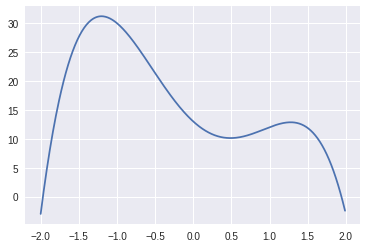

最大値でのx座標：  1.3599999999999994
そのときのエネルギー 12.73748736
0.04427529784808304


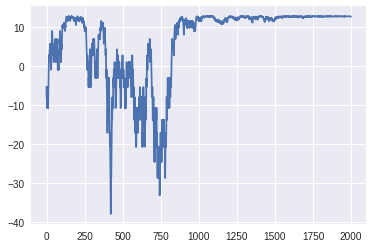

In [0]:
# この関数の最大値を探す。エネルギーを表す。
def f(x):
  return -4*x**4+3*x**3+12*x**2-12*x+13

#解初期値
x=2
xmax = x
ep = f(x) #epは前のエネルギー

#温度
t = 1000 # ハイパーパラメータなので変えると違うところで安定する。例えば0にすると……。
tp = 0.995 

eh=[] 
for i in range(2000):
  dx = (0.04 if np.random.random_sample()>=0.5 else -0.04) # 左右どっちに行くか。0.04の刻み幅もハイパーパラメータなので、0.05とかに変えてみると結果が変わる。
  x = xmax + dx 
  en = f(x)                              # 新しいxでのエネルギー
  ed = en-ep                             # 前と後のエネルギーの差
  r = np.random.random_sample()          # ランダムの値
  p = np.exp(-np.abs(ed)/t)              # 温度とエネルギーの差によって変わる確率
  if ed>0 or r < p:                      # 差がプラス、もしくはマイナスのときでも確率的に更新する。
    xmax = x
    ep = en
  eh.append(ep)
  t = t*tp                               # だんだん温度を下げていき、安定させていく
  
# f(x)のグラフ描画
print("f(x)のグラフ描画 ")
x = np.arange(-2,2,0.01) 
y =-4*x**4+3*x**3+12*x**2-12*x+13
plt.plot(x,y) 
plt.show() 

print("最大値でのx座標： ",xmax)
print("そのときのエネルギー",ep)
print(t)
plt.plot(eh)
plt.show()

↑t=100、dx=0.04 or -0.04 で実行すると、そのたびに、確率的に違う解に行きます。最大値でのx座標が1.2あたりと出たときは局所解にとらわれていて、-1.2と出たときが大域最適解です。


2-opt swap + SA による巡回セールスマン問題

In [0]:
points=[[0,0],[10,3],[1,8],[6,3],[3,10],[5,5],[8,5]]
initial_route=[0,1,2,3,4,5,6]

In [0]:
def swap(route):
  t1 = np.random.randint(0, len(route)) # どれか1地点
  t2 = np.random.randint(0, len(route)) # もう1つどれか1地点
  p1 = min(t1, t2) 
  p2 = max(t1, t2)
  # print(p1,p2)
  
  # 新しいルートを作っていく
  new_route=[]
  for i in range(p1):
    new_route.append(route[i]) # p1まではそのまま
  for i in range(p1,p2+1):
    new_route.append(route[p2-(i-p1)]) # p2からp1までを逆順にする
  for i in range(p2+1, len(route)):
    new_route.append(route[i]) # p2からはそのまま
  return new_route

In [0]:
print(swap(initial_route))

[0, 1, 4, 3, 2, 5, 6]


In [0]:
# エネルギーを計算
def get_energy(route):
  distance_sum = 0
  N = len(route)
  
  for i in range(N-1):
    distance_sum += \
    np.sqrt(( points[route[i+1]][0] \
             - points[route[i]][0])**2 \
             + (points[route[i+1]][1] \
             - points[route[i]][1])**2)
    
  distance_sum += \
  np.sqrt(( points[route[0]][0]\
           - points[route[N-1]][0])**2\
           + (points[route[0]][1] \
           - points[route[N-1]][1])**2)
  
  return distance_sum

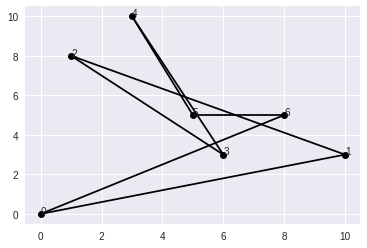

In [0]:
# プロット
def plotPoints(route):
  for i in range(len(route)):
    plt.plot(points[route[i]][0],points[route[i]][1],\
             "o", color='k')
    plt.text(points[route[i]][0],points[route[i]][1],\
             str(i))
  N = len(route)
  for i in range(N-1):
    plt.plot((points[route[i]][0], \
              points[route[i+1]][0]),\
             (points[route[i]][1], \
              points[route[i+1]][1]), color='k')
  plt.plot((points[route[N-1]][0],points[route[0]][0]),\
           (points[route[N-1]][1],points[route[0]][1]),\
           color='k')
  plt.show()
plotPoints(initial_route)

In [0]:
current_route = np.copy(initial_route)
ep = get_energy(initial_route)
eh = []

# 温度
t = 10
tp = 0.995

for i in range(1000):
  newr_tmp = swap(current_route) # 2-opt swapさせた新ルート
  en = get_energy(newr_tmp) # そのエネルギー
  ed = en - ep # 前のエネルギーとの差
  r = np.random.random_sample()
  p = np.exp(-np.abs(ed)/t) 
  if ed<0 or r<p: # 以前よりエネルギーが小さくなった場合 or 確率的に
    current_route = newr_tmp # 最初のときほど大きな確率で、エネルギーが大きくても更新する
    ep = en 
    eh.append(ep)
  t = t*tp # 試行ごとに温度を下げていく

53.24192350681804
32.8124807374248


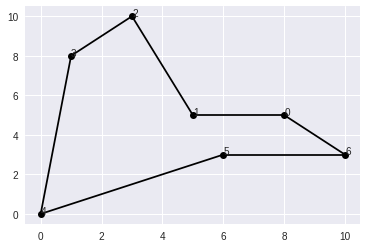

In [0]:
print(get_energy(initial_route))
print(get_energy(current_route))
plotPoints(current_route)

自然数分割問題

In [0]:
# エネルギーを計算
def get_energy(qs, qubo):
  e = np.dot(np.dot(qs, qubo), qs)
  return e

In [0]:
qubo = [[0,2,3,4], [0,0,6,8], \
        [0,0,0,12], [0,0,0,0]]
# 解初期値
qs = [1 if item == 1 else -1 for item \
      in np.random.randint(0,1,(len(qubo[0])))]

ep = get_energy(qs, qubo) # 初期状態のエネルギー

# 温度
t = 10
tp = 0.995
th = []

for i in range(1000):
  qi = np.random.randint(0, len(qs)) # （1〜4）からランダムなビットを選ぶ
  qs_tmp = [item for item in qs]     # 仮の状態
  qs_tmp[qi] = ( 1 if qs[qi]== -1 else -1) # 1つだけ反転させる
  en = get_energy(qs_tmp, qubo) # そのときのエネルギーの計算
  ed = en - ep # 前と差を取る
  r = np.random.random_sample()
  p = np.exp(-np.abs(ed)/t) # 最初のときほど大きな確率で、エネルギーが大きくても更新する
  if ed < 0 or r < p: # 以前よりエネルギーが小さくなった場合 or 確率的に
    qs = qs_tmp # ビットの状態を更新
    ep = en
  t = t*tp # 試行ごとに温度を下げていく
  
print(qs)

[1, -1, -1, 1]


In [5]:
! pip3 install blueqat

In [0]:
from blueqat import opt

a = opt.opt()
# 第一引数に数式を入れて、第二引数に利用する量子ビット数を入れる
a.qubo = opt.optm("(q0+q1+q2+q3+q4+q5-3)^2\
                  + 0.7*(3-q0*q4-q0*q1-q1*q4\
                  -q1*q2-q2*q3-q3*q4-q3*q5)",\
                  6) 

In [11]:
# 100回計算。
result = a.sa(shots=100, sampler="fast") # シミュレーテッドアニーリング
opt.counter(result) 

Counter({'000111': 1, '011110': 10, '110010': 89})

In [17]:
from blueqat import vqe
qubo = opt.pauli(a.qubo)
step = 40
result = vqe.Vqe(vqe.QaoaAnsatz(qubo, step)).run()
result.most_common(10)

(((1, 1, 0, 0, 1, 0), 0.10910530166611271),
 ((1, 0, 0, 1, 1, 1), 0.08788743114859225),
 ((0, 1, 1, 1, 1, 0), 0.08756731345073464),
 ((0, 1, 0, 1, 1, 0), 0.08626296658341234),
 ((1, 0, 0, 1, 1, 0), 0.06388361237510357),
 ((0, 1, 1, 1, 0, 1), 0.06338883314715836),
 ((1, 1, 0, 1, 1, 0), 0.05769249009091062),
 ((0, 0, 1, 1, 0, 1), 0.04752116089601489),
 ((1, 1, 0, 1, 0, 0), 0.03423610528279995),
 ((1, 1, 1, 1, 0, 0), 0.03218546914036658))

In [0]:
from blueqat import opt
a = opt.opt()
a.J = [[1,1],[0,1]]
a.sa()

[1, 0]